# What is it?

Genetic Algorithms (GA) are a family of search algorithms inspired by the principles of evolution in nature. It is a sort of **evolutionary computation** algorithm. 

By imitating the process of natural selection and reproduction, genetic algorithms can produce high-quality solutions for various problems involving search, optimization, and learning.

## From Darwin

* Variation
* Inheritance
* Selection

GA maintains a *population* of candidate solutions., called **individuals**. These candidate solutions are iteratively evaluated and used to create a new generation of solutions. Those better at solving this problem have a greater chance of being selected and passing their qualities to the next generation of candidate solutions. This way, as generations go by, candidate solutions get better at solving the problem.


### Genotype

In GA, each individual is represented by a chromosome with a collection of genes. For example, a chromosome can be expressed as a binary string, where each bit represents a single gene

<p align="center">
<img src="images/Chromosome.jpg" alt= “” width="500">
</p>

### Population

At any point in time, genetic algorithms maintain a population of individuals – a collection of candidate solutions for the problem at hand

<p align="center">
<img src="images/Population.png" alt= “” width="500">
</p>
    
### Fitness function

At each iteraction, the individuals are evaluated using a fitness function. 


### Crossover

Create a pair of new individuals, from two parents from the current generation. Part of the chromossomes are interchanged.

<p align="center">
<img src="images/Crossover.png" alt= “” width="600">
</p>
    
    
### Mutation

Periodically and randomly refresh the population, introducing new patterns into the chromossomes.

<p align="center">
<img src="images/Mutation.png" alt= “” width="400">
</p>
    
    
## Basic flow of genetic algorithm

<p align="center">
<img src="images/FlowChart.png" alt= “” width="700">
</p>

***

# Example problem

## Optimize a truck load

* Different products
    * price
    * size (m^3)

Constraint

* truck size
* total price



# Product Class

In [1]:
import numpy as np
from random import random
import matplotlib.pyplot as plt


In [2]:
class Product():
    def __init__(self, name, space, price):
        self.name = name
        self.space = space
        self.price = price

    

We can create our product attributes by just calling the class Product. 

In [3]:
products_list = []
products_list.append(Product(name='refrigerator A', space=0.751, price=999.9))
products_list.append(Product('Cell Phone', 0.00000899, 2199.12))
products_list.append(Product('TV 55', 0.400, 4346.99))
products_list.append(Product("TV 50' ", 0.290, 3999.90))
products_list.append(Product("TV 42' ", 0.200, 2999.00))
products_list.append(Product("Laptop A", 0.00350, 2499.90))
products_list.append(Product("Fan", 0.496, 199.90))
products_list.append(Product("Microwave A", 0.0424, 308.66))
products_list.append(Product("Microwave B", 0.0544, 429.90))
products_list.append(Product("Microwave C", 0.0319, 299.29))
products_list.append(Product("Refrigerator B", 0.635, 849.00))
products_list.append(Product("Refrigerator C", 0.870, 1199.89))
products_list.append(Product("Laptop B", 0.498, 1999.90))
products_list.append(Product("Laptop C", 0.527, 3999.00)) 

# print the list

for product in products_list:
    print(product.name, ' - ', product.price, ' - ', product.space)

refrigerator A  -  999.9  -  0.751
Cell Phone  -  2199.12  -  8.99e-06
TV 55  -  4346.99  -  0.4
TV 50'   -  3999.9  -  0.29
TV 42'   -  2999.0  -  0.2
Laptop A  -  2499.9  -  0.0035
Fan  -  199.9  -  0.496
Microwave A  -  308.66  -  0.0424
Microwave B  -  429.9  -  0.0544
Microwave C  -  299.29  -  0.0319
Refrigerator B  -  849.0  -  0.635
Refrigerator C  -  1199.89  -  0.87
Laptop B  -  1999.9  -  0.498
Laptop C  -  3999.0  -  0.527


# Individual Class

Each individual will be represented by a gene. And the solution will be the chromossome.
* We must first iniciallize the individuals set as a list of *zeros* (not going) and *ones* (goint into the truck)

[0,1,0,0,0,0,0,0,0,1,1,0,0,1]

Each position is related to a product

In [4]:
class Individual():
    def __init__(self, space: list=[], prices: list=[], space_limit: float=0, generation: int=0):
        self.spaces = spaces
        self.prices = prices
        self.sace_limit = space_limit
        self.generation = generation
        # inicialize the first (random) set of products 
        self.chromosome = []
        for i in range (len(spaces)):
            if random() < 0.5:
                self.chromosome.append('0')
            else:
                self.chromosome.append('1')

In [5]:
spaces = [product.space for product in products_list]
prices = [product.price for product in products_list]
names = [product.name for product in products_list]
limit = 3 # limit truck size 3m^2

## Create the individual

In [6]:
individual1 = Individual(spaces, prices, limit)
print("Spaces: ", individual1.spaces)
print("Prices: ", individual1.prices)
print("Chromossome: ",individual1.chromosome)

Spaces:  [0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527]
Prices:  [999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0]
Chromossome:  ['0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0']


In [7]:
for i in range(len(products_list)):
    if individual1.chromosome[i] == '1':
        print('Name: ', products_list[i].name)

Name:  Microwave A
Name:  Microwave B


# Fitness function

In [8]:
class Individual():
    def __init__(self, space: list=[], prices: list=[], space_limit: float=0, generation: int=0):
        self.spaces = spaces
        self.prices = prices
        self.space_limit = space_limit
        # new attribures
        self.score_evaluation = 0
        self.used_space = 0
        self.generation = generation
        # inicialize the first (random) set of products 
        self.chromosome = []
        for i in range (len(spaces)):
            if random() < 0.5:
                self.chromosome.append('0')
            else:
                self.chromosome.append('1')

    def fitness(self):
        score = 0
        sum_spaces = 0
        for i in range(len(self.chromosome)):
            if self.chromosome[i] == '1':
                score += self.prices[i]
                sum_spaces += self.spaces[i]
        
        if sum_spaces > self.space_limit:
            score = 1
        
        self.score_evaluation = score
        self.used_space = sum_spaces

In [9]:
individual1 = Individual(spaces, prices, limit)
for i in range(len(products_list)):
    if individual1.chromosome[i] == '1':
        print('Name: ', products_list[i].name)

individual1.fitness()
print('Score: ', individual1.score_evaluation)
print('Used Space: ', individual1.used_space)
print('Chromosome: ', individual1.chromosome)

Name:  TV 55
Name:  TV 42' 
Name:  Laptop A
Name:  Fan
Name:  Microwave A
Name:  Microwave B
Name:  Microwave C
Name:  Refrigerator B
Name:  Refrigerator C
Score:  13132.529999999999
Used Space:  2.7332
Chromosome:  ['0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0']


# Crossover funtion


In [10]:
individual2 = Individual(spaces, prices, limit)
for i in range(len(products_list)):
    if individual2.chromosome[i] == '1':
        print('Name: ', products_list[i].name)

individual2.fitness()
print('Score: ', individual2.score_evaluation)
print('Used Space: ', individual2.used_space)
print('Chromosome: ', individual2.chromosome)

Name:  Cell Phone
Name:  TV 55
Name:  TV 42' 
Name:  Laptop A
Name:  Fan
Name:  Microwave C
Name:  Refrigerator B
Name:  Refrigerator C
Name:  Laptop B
Score:  1
Used Space:  3.13440899
Chromosome:  ['0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '0']


### Combining two cromosomes

In [11]:
class Individual():
    def __init__(self, space: list=[], prices: list=[], space_limit: float=0, generation: int=0):
        self.spaces = spaces
        self.prices = prices
        self.space_limit = space_limit
        # new attribures
        self.score_evaluation = 0
        self.used_space = 0
        self.generation = generation
        # inicialize the first (random) set of products 
        self.chromosome = []
        for i in range (len(spaces)):
            if random() < 0.5:
                self.chromosome.append('0')
            else:
                self.chromosome.append('1')

    def fitness(self):
        score = 0
        sum_spaces = 0
        for i in range(len(self.chromosome)):
            if self.chromosome[i] == '1':
                score += self.prices[i]
                sum_spaces += self.spaces[i]
        
        if sum_spaces > self.space_limit:
            score = 1
        
        self.score_evaluation = score
        self.used_space = sum_spaces

    def crossover(self, other_individual):
        cutoff = round(random() * len(self.chromosome))
        # print(cutoff)

        # spliting the chromosome
        child1 = other_individual.chromosome[0:cutoff] + self.chromosome[cutoff::]
        child2 = self.chromosome[0:cutoff] + other_individual.chromosome[cutoff::]
        # print(child1)
        # print(child2)
        # the new individual must have all the information as well, but incrementing the generation
        children = [Individual(self.spaces, self.prices, self.space_limit, self.generation+1),
                    Individual(self.spaces, self.prices, self.space_limit, self.generation+1)]
        children[0].chromosome = child1
        children[1].chromosome = child2
    

        return children



In [19]:
individual1 = Individual(spaces, prices, limit)
for i in range(len(products_list)):
    if individual1.chromosome[i] == '1':
        print('Name: ', products_list[i].name)

individual1.fitness()
print('Score: ', individual1.score_evaluation)
print('Used Space: ', individual1.used_space)
print('Chromosome: ', individual1.chromosome)

Name:  refrigerator A
Name:  Cell Phone
Name:  TV 42' 
Name:  Laptop A
Name:  Microwave A
Name:  Microwave B
Name:  Refrigerator B
Name:  Laptop B
Score:  12285.38
Used Space:  2.18430899
Chromosome:  ['1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '0']


In [20]:
individual2 = Individual(spaces, prices, limit)
for i in range(len(products_list)):
    if individual2.chromosome[i] == '1':
        print('Name: ', products_list[i].name)

individual2.fitness()
print('Score: ', individual2.score_evaluation)
print('Used Space: ', individual2.used_space)
print('Chromosome: ', individual2.chromosome)

Name:  refrigerator A
Name:  TV 55
Name:  TV 50' 
Name:  Microwave A
Name:  Microwave B
Name:  Microwave C
Name:  Laptop B
Name:  Laptop C
Score:  16383.539999999999
Used Space:  2.5947000000000005
Chromosome:  ['1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1']


In [21]:
children = individual1.crossover(individual2)

In [22]:
children[0].fitness()
print(children[0].score_evaluation)
print(children[0].chromosome)

12384.539999999999
['1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0']


In [23]:
children[1].fitness()
print(children[1].score_evaluation)
print(children[1].chromosome)

16284.38
['1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1']


# Mutation

Randomly change the value of a gene. Usually change in a probablility very small


In [24]:
class Individual():
    def __init__(self, space: list=[], prices: list=[], space_limit: float=0, generation: int=0):
        self.spaces = spaces
        self.prices = prices
        self.space_limit = space_limit
        # new attribures
        self.score_evaluation = 0
        self.used_space = 0
        self.generation = generation
        # inicialize the first (random) set of products 
        self.chromosome = []
        for i in range (len(spaces)):
            if random() < 0.5:
                self.chromosome.append('0')
            else:
                self.chromosome.append('1')

    def fitness(self):
        score = 0
        sum_spaces = 0
        for i in range(len(self.chromosome)):
            if self.chromosome[i] == '1':
                score += self.prices[i]
                sum_spaces += self.spaces[i]
        
        if sum_spaces > self.space_limit:
            score = 1
        
        self.score_evaluation = score
        self.used_space = sum_spaces

    def crossover(self, other_individual):
        cutoff = round(random() * len(self.chromosome))

        # spliting the chromosome
        child1 = other_individual.chromosome[0:cutoff] + self.chromosome[cutoff::]
        child2 = self.chromosome[0:cutoff] + other_individual.chromosome[cutoff::]

        # the new individual must have all the information as well, but incrementing the generation
        children = [Individual(self.spaces, self.prices, self.space_limit, self.generation+1),
                    Individual(self.spaces, self.prices, self.space_limit, self.generation+1)]
        children[0].chromosome = child1
        children[1].chromosome = child2

        return children

    def mutation(self, rate):
        print("Before: ", self.chromosome)
        for i in range(len(self.chromosome)):
            if random() < rate:
                if self.chromosome[i] == '1':
                    self.chromosome[i] = '0'
                else:
                    self.chromosome[i] = '1'
        
        print('After: ', self.chromosome)
        return self


In [26]:
individual1 = Individual(spaces, prices, limit)
individual1.fitness()

print('Score1: ', individual1.score_evaluation)

individual2 = Individual(spaces, prices, limit)
individual2.fitness()

print('Score2: ', individual1.score_evaluation)

children = individual1.crossover(individual2)
children[0].fitness()
children[1].fitness()

Score1:  15923.98
Score2:  15923.98


In [28]:
individual1.mutation(0.4)

Before:  ['0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1']
After:  ['1', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0']


# Genetic Algorithm

In [30]:
class GeneticAlgorithm():
    def __init__(self, population_size):
        self.population_size = population_size
        self.population = [] # store each one of individual objects
        self.generation = 0
        self.best_solution = None
        self.list_of_solutions = []

    def initialize_population(self, spaces, prices, space_limit):
        for i in range(self.population_size):
            self.population.append(Individual(spaces, prices, space_limit))
        self.best_solution = self.population[0] # need to evaluate the best combination of products and set to the top of list

        

In [31]:
# random indivuals (combination of products)
population_size = 20
ga = GeneticAlgorithm(population_size)
ga.initialize_population(spaces, prices, limit)

# Evaluate the population

We evaluate analyzing the fitness function 

In [33]:
# update the attributes socre_evaluation and the used_space
for individual in ga.population:
    individual.fitness()
for i in range(ga.population_size):
    print('Individual: ', i, '\nSpaces: ', ga.population[i].spaces, '\nPrices: ', ga.population[i].prices,
          '\nChrmosome: ', ga.population[i].chromosome, '\nScore: ', ga.population[i].score_evaluation, '\n')

Individual:  0 
Spaces:  [0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
Prices:  [999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0] 
Chrmosome:  ['1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1'] 
Score:  14935.57 

Individual:  1 
Spaces:  [0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
Prices:  [999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0] 
Chrmosome:  ['0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1'] 
Score:  11984.66 

Individual:  2 
Spaces:  [0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
Prices:  [999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0] 
Chrmosome:  ['0', '0', '0', '0', '0', '0', '1', '1

create a function to order the population

In [34]:
class GeneticAlgorithm():
    def __init__(self, population_size):
        self.population_size = population_size
        self.population = [] # store each one of individual objects
        self.generation = 0
        self.best_solution = None
        self.list_of_solutions = []

    def initialize_population(self, spaces, prices, space_limit):
        for i in range(self.population_size):
            self.population.append(Individual(spaces, prices, space_limit))
        self.best_solution = self.population[0] # need to evaluate the best combination of products and set to the top of list

    def order_population(self):
        # sort the list based in the score
        self.population = sorted(self.population, key=lambda population: population.score_evaluation, reverse=True)

In [35]:
# random indivuals (combination of products)
population_size = 20
ga = GeneticAlgorithm(population_size)
ga.initialize_population(spaces, prices, limit)
# order popuation
ga.order_population()
# update the attributes socre_evaluation and the used_space
for individual in ga.population:
    individual.fitness()
for i in range(ga.population_size):
    print('Individual: ', i, '\nSpaces: ', ga.population[i].spaces, '\nPrices: ', ga.population[i].prices,
          '\nChrmosome: ', ga.population[i].chromosome, '\nScore: ', ga.population[i].score_evaluation, '\n')

Individual:  0 
Spaces:  [0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
Prices:  [999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0] 
Chrmosome:  ['0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0'] 
Score:  6784.629999999999 

Individual:  1 
Spaces:  [0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
Prices:  [999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0] 
Chrmosome:  ['1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1'] 
Score:  1 

Individual:  2 
Spaces:  [0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
Prices:  [999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0] 
Chrmosome:  ['0', '0', '1', '0', '0', '0', '0', 

#### Put the best solution in the first place

In [36]:
class GeneticAlgorithm():
    def __init__(self, population_size):
        self.population_size = population_size
        self.population = [] # store each one of individual objects
        self.generation = 0
        self.best_solution = None
        self.list_of_solutions = []

    def initialize_population(self, spaces, prices, space_limit):
        for i in range(self.population_size):
            self.population.append(Individual(spaces, prices, space_limit))
        self.best_solution = self.population[0] # need to evaluate the best combination of products and set to the top of list

    def order_population(self):
        # sort the list based in the score
        self.population = sorted(self.population, key=lambda population: population.score_evaluation, reverse=True)

    def best_individual(self, individual):
        if individual.score_evaluation > self.best_solution.score_evaluation:
            self.best_solution = individual


In [37]:
population_size = 20
ga = GeneticAlgorithm(population_size)
ga.initialize_population(spaces, prices, limit)
# order popuation
ga.order_population()
# update the attributes socre_evaluation and the used_space
for individual in ga.population:
    individual.fitness()
for i in range(ga.population_size):
    print('Individual: ', i, '\nSpaces: ', ga.population[i].spaces, '\nPrices: ', ga.population[i].prices,
          '\nChrmosome: ', ga.population[i].chromosome, '\nScore: ', ga.population[i].score_evaluation, '\n')

Individual:  0 
Spaces:  [0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
Prices:  [999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0] 
Chrmosome:  ['0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0'] 
Score:  13854.349999999999 

Individual:  1 
Spaces:  [0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
Prices:  [999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0] 
Chrmosome:  ['0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0'] 
Score:  8987.15 

Individual:  2 
Spaces:  [0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
Prices:  [999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0] 
Chrmosome:  ['0', '1', '1', '0', '1', '0'

## Select Parents

In [38]:
class GeneticAlgorithm():
    def __init__(self, population_size):
        self.population_size = population_size
        self.population = [] # store each one of individual objects
        self.generation = 0
        self.best_solution = None
        self.list_of_solutions = []

    def initialize_population(self, spaces, prices, space_limit):
        for i in range(self.population_size):
            self.population.append(Individual(spaces, prices, space_limit))
        self.best_solution = self.population[0] # need to evaluate the best combination of products and set to the top of list

    def order_population(self):
        # sort the list based in the score
        self.population = sorted(self.population, key=lambda population: population.score_evaluation, reverse=True)

    def best_individual(self, individual):
        if individual.score_evaluation > self.best_solution.score_evaluation:
            self.best_solution = individual

    def sum_evaluations(self):
        sums = 0
        for individual in self.population:
            sums += individual.score_evaluation
        return sums

In [39]:
population_size = 20
ga = GeneticAlgorithm(population_size)
ga.initialize_population(spaces, prices, limit)
# order popuation
ga.order_population()
# update the attributes socre_evaluation and the used_space
for individual in ga.population:
    individual.fitness()
for i in range(ga.population_size):
    print('Individual: ', i, '\nSpaces: ', ga.population[i].spaces, '\nPrices: ', ga.population[i].prices,
          '\nChrmosome: ', ga.population[i].chromosome, '\nScore: ', ga.population[i].score_evaluation, '\n')

Individual:  0 
Spaces:  [0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
Prices:  [999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0] 
Chrmosome:  ['0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1'] 
Score:  12897.59 

Individual:  1 
Spaces:  [0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
Prices:  [999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0] 
Chrmosome:  ['1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1'] 
Score:  1 

Individual:  2 
Spaces:  [0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
Prices:  [999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0] 
Chrmosome:  ['0', '1', '1', '0', '0', '1', '1', '0', '0',

In [34]:
ga.sum_evaluations()

143844.81999999998

### Select the parents

Roulete method

In [40]:
class GeneticAlgorithm():
    def __init__(self, population_size):
        self.population_size = population_size
        self.population = [] # store each one of individual objects
        self.generation = 0
        self.best_solution = None
        self.list_of_solutions = []

    def initialize_population(self, spaces, prices, space_limit):
        for i in range(self.population_size):
            self.population.append(Individual(spaces, prices, space_limit))
        self.best_solution = self.population[0] # need to evaluate the best combination of products and set to the top of list

    def order_population(self):
        # sort the list based in the score
        self.population = sorted(self.population, key=lambda population: population.score_evaluation, reverse=True)

    def best_individual(self, individual):
        if individual.score_evaluation > self.best_solution.score_evaluation:
            self.best_solution = individual

    def sum_evaluations(self):
        sums = 0
        for individual in self.population:
            sums += individual.score_evaluation
        return sums

    def select_parent(self, sum_evaluation):
        # select one of the individuals to apply crossover, mutation....
        parent = -1 # we will not return any result at first and than update it
        random_value = random() * sum_evaluation
        summ = 0
        i = 0
        print("***** random value: ", random_value)
        while i < len(self.population) and summ < random_value:
            print("i: ", i, " - sum: ", summ)
            summ += self.population[i].score_evaluation
            parent += 1
            i += 1
        return parent




In [41]:
population_size = 20
ga = GeneticAlgorithm(population_size)
ga.initialize_population(spaces, prices, limit)
# order popuation
ga.order_population()
# update the attributes socre_evaluation and the used_space
for individual in ga.population:
    individual.fitness()
for i in range(ga.population_size):
    print('Individual: ', i, '\nSpaces: ', ga.population[i].spaces, '\nPrices: ', ga.population[i].prices,
          '\nChrmosome: ', ga.population[i].chromosome, '\nScore: ', ga.population[i].score_evaluation, '\n')

Individual:  0 
Spaces:  [0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
Prices:  [999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0] 
Chrmosome:  ['1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0'] 
Score:  1 

Individual:  1 
Spaces:  [0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
Prices:  [999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0] 
Chrmosome:  ['1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0'] 
Score:  8355.349999999999 

Individual:  2 
Spaces:  [0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
Prices:  [999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0] 
Chrmosome:  ['1', '1', '0', '1', '0', '0', '0', 

In [42]:
ss = ga.sum_evaluations()
print(ss)

179738.72


In [43]:
parent1 = ga.select_parent(ss)
parent1
parent2 = ga.select_parent(ss)
parent2

***** random value:  68981.6785704829
i:  0  - sum:  0
i:  1  - sum:  1
i:  2  - sum:  8356.349999999999
i:  3  - sum:  8357.349999999999
i:  4  - sum:  19011.42
i:  5  - sum:  31866.19
i:  6  - sum:  51301.47
i:  7  - sum:  56739.73
***** random value:  53495.66838779651
i:  0  - sum:  0
i:  1  - sum:  1
i:  2  - sum:  8356.349999999999
i:  3  - sum:  8357.349999999999
i:  4  - sum:  19011.42
i:  5  - sum:  31866.19
i:  6  - sum:  51301.47


6

### Select two random parents and then crossover

Evaluate the new population that was generate using mutation and crossover

In [44]:
class GeneticAlgorithm():
    def __init__(self, population_size):
        self.population_size = population_size
        self.population = [] # store each one of individual objects
        self.generation = 0
        self.best_solution = None
        self.list_of_solutions = []

    def initialize_population(self, spaces, prices, space_limit):
        for i in range(self.population_size):
            self.population.append(Individual(spaces, prices, space_limit))
        self.best_solution = self.population[0] # need to evaluate the best combination of products and set to the top of list

    def order_population(self):
        # sort the list based in the score
        self.population = sorted(self.population, key=lambda population: population.score_evaluation, reverse=True)

    def best_individual(self, individual):
        if individual.score_evaluation > self.best_solution.score_evaluation:
            self.best_solution = individual

    def sum_evaluations(self):
        sums = 0
        for individual in self.population:
            sums += individual.score_evaluation
        return sums

    def select_parent(self, sum_evaluation):
        # select one of the individuals to applu crossover, mutaion....
        parent = -1 # we will not return any result at first and than update it
        random_value = random() * sum_evaluation
        summ = 0
        i = 0
        # print("***** random valua: ", random_value)
        while i < len(self.population) and summ < random_value:
            # print("i: ", i, " - sum: ", summ)
            summ += self.population[i].score_evaluation
            parent += 1
            i += 1
        return parent


In [45]:
population_size = 20
ga = GeneticAlgorithm(population_size)
ga.initialize_population(spaces, prices, limit)
# order popuation
ga.order_population()
# update the attributes socre_evaluation and the used_space
for individual in ga.population:
    individual.fitness()
for i in range(ga.population_size):
    print('Individual: ', i, '\nSpaces: ', ga.population[i].spaces, '\nPrices: ', ga.population[i].prices,
          '\nChrmosome: ', ga.population[i].chromosome, '\nScore: ', ga.population[i].score_evaluation, '\n')

Individual:  0 
Spaces:  [0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
Prices:  [999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0] 
Chrmosome:  ['0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1'] 
Score:  21002.35 

Individual:  1 
Spaces:  [0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
Prices:  [999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0] 
Chrmosome:  ['1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0'] 
Score:  12654.539999999999 

Individual:  2 
Spaces:  [0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
Prices:  [999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0] 
Chrmosome:  ['0', '0', '0', '1', '0', '0

In [46]:
ss = ga.sum_evaluations()
print(ss)
new_population = []
mutation_probability  = 0.01
for new_individuals in range(0, ga.population_size, 2):
    # print(new_individuals)
    parent1 = ga.select_parent(ss)
    parent2 = ga.select_parent(ss)
    print('\n',parent1, parent2)
    chindren = ga.population[parent1].crossover(ga.population[parent2])
    print(ga.population[parent1].chromosome)
    print(ga.population[parent2].chromosome)
    print(children[0].chromosome)
    print(children[1].chromosome)

    new_population.append(children[0].mutation(mutation_probability))
    new_population.append(children[1].mutation(mutation_probability))

170107.09000000003

 15 6
['1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1']
['1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0']
['1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1']
['0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1']
Before:  ['1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1']
After:  ['1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1']
Before:  ['0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1']
After:  ['0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1']

 5 10
['0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1']
['0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1']
['1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1']
['0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1']
Before:  ['1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1']
A

### Define the stoping criterium


In [47]:
class Individual():
    def __init__(self, space: list=[], prices: list=[], space_limit: float=0, generation: int=0):
        self.spaces = spaces
        self.prices = prices
        self.space_limit = space_limit
        # new attribures
        self.score_evaluation = 0
        self.used_space = 0
        self.generation = generation
        # inicialize the first (random) set of products 
        self.chromosome = []
        for i in range (len(spaces)):
            if random() < 0.5:
                self.chromosome.append('0')
            else:
                self.chromosome.append('1')

    def fitness(self):
        score = 0
        sum_spaces = 0
        for i in range(len(self.chromosome)):
            if self.chromosome[i] == '1':
                score += self.prices[i]
                sum_spaces += self.spaces[i]
        
        if sum_spaces > self.space_limit:
            score = 1
        
        self.score_evaluation = score
        self.used_space = sum_spaces

    def crossover(self, other_individual):
        cutoff = round(random() * len(self.chromosome))

        # spliting the chromosome
        child1 = other_individual.chromosome[0:cutoff] + self.chromosome[cutoff::]
        child2 = self.chromosome[0:cutoff] + other_individual.chromosome[cutoff::]

        # the new individual must have all the information as well, but incrementing the generation
        children = [Individual(self.spaces, self.prices, self.space_limit, self.generation+1),
                    Individual(self.spaces, self.prices, self.space_limit, self.generation+1)]
        children[0].chromosome = child1
        children[1].chromosome = child2

        return children

    def mutation(self, rate):
        # print("Before: ", self.chromosome)
        for i in range(len(self.chromosome)):
            if random() < rate:
                if self.chromosome[i] == '1':
                    self.chromosome[i] = '0'
                else:
                    self.chromosome[i] = '1'
        
        # print('After: ', self.chromosome)
        return self

class GeneticAlgorithm():
    def __init__(self, population_size):
        self.population_size = population_size
        self.population = [] # store each one of individual objects
        self.generation = 0
        self.best_solution = None
        self.list_of_solutions = []

    def initialize_population(self, spaces, prices, space_limit):
        for i in range(self.population_size):
            self.population.append(Individual(spaces, prices, space_limit))
        self.best_solution = self.population[0] # need to evaluate the best combination of products and set to the top of list

    def order_population(self):
        # sort the list based in the score
        self.population = sorted(self.population, key=lambda population: population.score_evaluation, reverse=True)

    def best_individual(self, individual):
        if individual.score_evaluation > self.best_solution.score_evaluation:
            self.best_solution = individual

    def sum_evaluations(self):
        sums = 0
        for individual in self.population:
            sums += individual.score_evaluation
        return sums

    def select_parent(self, sum_evaluation):
        # select one of the individuals to applu crossover, mutaion....
        parent = -1 # we will not return any result at first and than update it
        random_value = random() * sum_evaluation
        summ = 0
        i = 0
        # print("***** random valua: ", random_value)
        while i < len(self.population) and summ < random_value:
            # print("i: ", i, " - sum: ", summ)
            summ += self.population[i].score_evaluation
            parent += 1
            i += 1
        return parent

    def visualize_generation(self):
        best = self.population[0]
        print('Generation: ', self.population[0].generation,
            'Total price: ', best.score_evaluation, 'Space: ', best.used_space,
            'Chromosome: ', best.chromosome)

    
    def solve(self, mutation_probability, number_of_generations, spaces, prices, limit):
        #initial population
        self.initialize_population(spaces, prices, limit)
        for individual in self.population:
            individual.fitness()
        self.order_population()
        self.best_solution = self.population[0]
        self.list_of_solutions.append(self.best_solution.score_evaluation)

        self.visualize_generation()

        ### stopping criteria

        for generation in range(number_of_generations):
            summ = self.sum_evaluations()
            new_population = []
            for new_individual in range(0, self.population_size, 2):
                #select parents
                parent1 =self.select_parent(summ)
                parent2 = self.select_parent(summ)
                chindren = self.population[parent1].crossover(self.population[parent2])
                new_population.append(chindren[0].mutation(mutation_probability))
                new_population.append(chindren[1].mutation(mutation_probability))

            self.population = list(new_population)

            for individual in self.population:
                individual.fitness()
            # self.visualize_generation()
            best =  self.population[0]
            self.list_of_solutions.append(best.score_evaluation)
            self.best_individual(best)

        print('**** Best Solution: ', self.best_solution.generation,
            'Total price: ', self.best_solution.score_evaluation, 'Space: ', self.best_solution.used_space,
            'Chromosome: ', self.best_solution.chromosome)


        return self.best_solution.chromosome


## Putting all together

In [49]:
products_list = []
products_list.append(Product("Refrigerator A", 0.751, 999.90))
products_list.append(Product("Cell phone", 0.0000899, 2911.12))
products_list.append(Product("TV 55' ", 0.400, 4346.99))
products_list.append(Product("TV 50' ", 0.290, 3999.90))
products_list.append(Product("TV 42' ", 0.200, 2999.00))
products_list.append(Product("Laptop A", 0.00350, 2499.90))
products_list.append(Product("Fan", 0.496, 199.90))
products_list.append(Product("Microwave A", 0.0424, 308.66))
products_list.append(Product("Microwave B", 0.0544, 429.90))
products_list.append(Product("Microwave C", 0.0319, 299.29))
products_list.append(Product("Refrigerator B", 0.635, 849.00))
products_list.append(Product("Refrigerator C", 0.870, 1199.89))
products_list.append(Product("Laptop B", 0.498, 1999.90))
products_list.append(Product("Laptop C", 0.527, 3999.00))
spaces = []
prices = []
names = []
for product in products_list:
    spaces.append(product.space)
    prices.append(product.price)
    names.append(product.name)
limit = 3
population_size = 20
mutation_probability = 0.01
number_of_generations = 500
ga = GeneticAlgorithm(population_size)
result = ga.solve(mutation_probability, number_of_generations, spaces, prices, limit)
# print(result)
# for i in range(len(products_list)):
#   if result[i] == '1':
#     print('Name: ', products_list[i].name, ' - Price: ', products_list[i].price)

Generation:  0 Total price:  17653.54 Space:  2.2887999999999997 Chromosome:  ['0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1']
**** Best Solution:  91 Total price:  24793.560000000005 Space:  2.7982899000000003 Chromosome:  ['1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1']


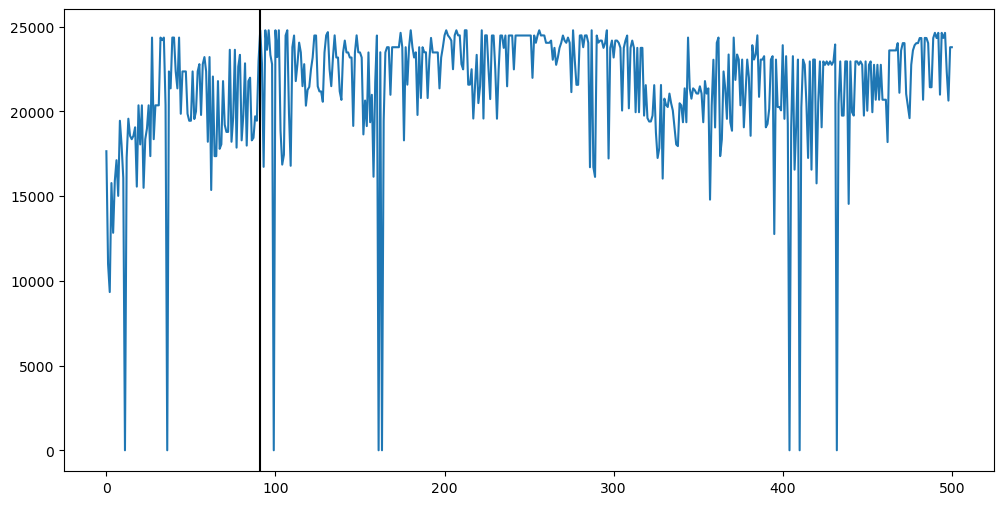

In [50]:
fig = plt.figure(figsize=(12,6))

plt.plot(range(0,number_of_generations+1), ga.list_of_solutions)
plt.axvline(x=ga.best_solution.generation, color='k')

# Using Deap module

In [57]:
!pip install deap

     |████████████████████████████████| 109 kB 4.0 MB/s eta 0:00:01


In [58]:
class Product():
    def __init__(self, name, space, price):
        self.name = name
        self.space = space
        self.price = price

In [65]:
p1 = Product('Refrigerator A', 0.751, 999.9)
p2 = Product('Cell phone', 0.00000899, 2199.12)

In [66]:
products_list = []
products_list.append(Product("Refrigerator A", 0.751, 999.90))
products_list.append(Product("Cell phone", 0.0000899, 2911.12))
products_list.append(Product("TV 55' ", 0.400, 4346.99))
products_list.append(Product("TV 50' ", 0.290, 3999.90))
products_list.append(Product("TV 42' ", 0.200, 2999.00))
products_list.append(Product("Notebook A", 0.00350, 2499.90))
products_list.append(Product("Ventilator", 0.496, 199.90))
products_list.append(Product("Microwave A", 0.0424, 308.66))
products_list.append(Product("Microwave B", 0.0544, 429.90))
products_list.append(Product("Microwave C", 0.0319, 299.29))
products_list.append(Product("Refrigerator B", 0.635, 849.00))
products_list.append(Product("Refrigerator C", 0.870, 1199.89))
products_list.append(Product("Notebook B", 0.498, 1999.90))
products_list.append(Product("Notebook C", 0.527, 3999.00))
spaces = []
prices = []
names = []
for product in products_list:
    spaces.append(product.space)
    prices.append(product.price)
    names.append(product.name)
limit = 3
population_size = 20
mutation_probability = 0.01
number_of_generations = 100 

In [60]:
import numpy
import random
from deap import base
from deap import creator
from deap import algorithms
from deap import tools

In [61]:
# [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]
def fitness(solution):
    cost = 0
    sum_space = 0
    for i in range(len(solution)):
        if solution[i] == 1:
            cost += prices[i]
            sum_space += spaces[i]
        if sum_space > limit:
            cost = 1
    return cost,

In [62]:
toolbox = base.Toolbox()
creator.create('FitnessMax', base.Fitness, weights=(1.0,))
creator.create('Individual', list, fitness=creator.FitnessMax)

In [63]:
toolbox.register('attr_bool', random.randint, 0, 1)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_bool, n=14)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)
toolbox.register('evaluate', fitness)
toolbox.register('mate', tools.cxOnePoint)
toolbox.register('mutate', tools.mutFlipBit, indpb = 0.01)
toolbox.register('select', tools.selRoulette)

In [64]:
population = toolbox.population(n = 20)
crossover_probability = 1.0
number_of_generations = 100

statistics = tools.Statistics(key = lambda individual: individual.fitness.values)
statistics.register('max', numpy.max)
statistics.register('min', numpy.min)
statistics.register('med', numpy.mean)
statistics.register('std', numpy.std)

population, info = algorithms.eaSimple(population, toolbox, crossover_probability, mutation_probability,
                                       number_of_generations, statistics)

gen	nevals	max    	min	med    	std    
0  	20    	19983.1	1  	8638.99	7044.25
1  	20    	19983.1	11146.9	14084.3	2340.74
2  	20    	20412.8	10197.8	14215.3	2654.44
3  	20    	18565.5	1      	11875  	5397.1 
4  	20    	23755.7	7307.46	14282.4	3195.04
5  	20    	23755.7	5307.56	13309.5	3561.07
6  	20    	24055  	1      	12828  	6316.12
7  	20    	24055  	11556.4	17755.7	4677.48
8  	20    	24055  	11556.4	18551.8	4527.62
9  	20    	24055  	13257  	21441.4	3431.6 
10 	20    	23755.7	14556.2	21411.3	2205.41
11 	20    	23755.7	17056.1	22360.4	1649.35
12 	20    	24055  	16056.2	22050.4	2196.73
13 	20    	24055  	15756.9	22225.4	2391.36
14 	20    	24055  	20055.1	22545.2	1320.18
15 	20    	24055  	19755.8	22640.3	1271.64
16 	20    	24055  	19755.8	22785.4	1194.97
17 	20    	24055  	19755.8	22130.4	1561   
18 	20    	24055  	20055.1	22690.5	1453.02
19 	20    	24055  	19755.8	22295.4	1624.98
20 	20    	24055  	19755.8	22330.4	1807.3 
21 	20    	24055  	19755.8	21830.6	1874.04
22 	20    	24055  	

In [67]:
best_solutions = tools.selBest(population, 1)
for individual in best_solutions:
    print(individual)
    print(individual.fitness)
    for i in range(len(individual)):
        if individual[i] == 1:
            print('Name: ', names[i], ' - Price: ', prices[i])

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1]
(23755.710000000003,)
Name:  Refrigerator A  - Price:  999.9
Name:  Cell phone  - Price:  2911.12
Name:  TV 55'   - Price:  4346.99
Name:  TV 50'   - Price:  3999.9
Name:  TV 42'   - Price:  2999.0
Name:  Notebook A  - Price:  2499.9
Name:  Notebook B  - Price:  1999.9
Name:  Notebook C  - Price:  3999.0


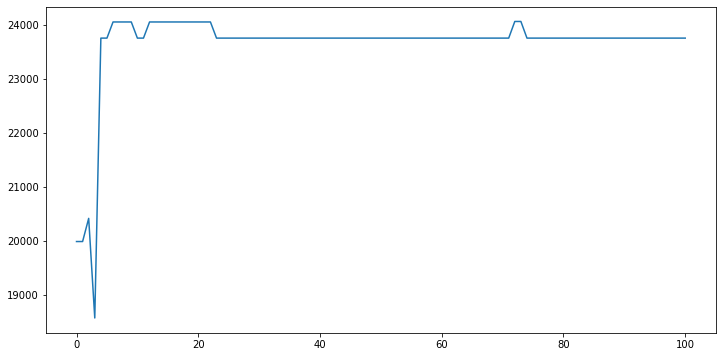

In [68]:
fig = plt.figure(figsize=(12,6))

plt.plot(range(0,101), info.select('max'))